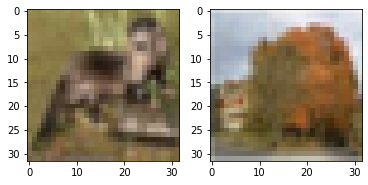

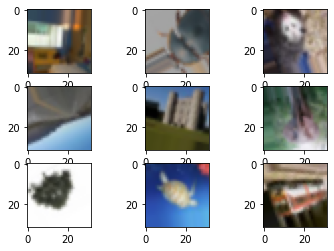

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)             

In [ ]:
import keras
from keras import layers, models,optimizers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from skimage import filters
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

#convert to grayscale and scale the intensities
#x_train = np.mean(x_train, axis=3)
#x_test = np.mean(x_test, axis=3)
fig, (ax1, ax2) = plt.subplots(1,2)
x_train = x_train/ 255.0
x_test = x_test / 255.0
ax1.imshow(x_train[100])
ax2.imshow(x_test[102])
plt.show()

x_val = x_train[40000:]
y_val = y_train[40000:]
x_train = x_train[:40000]
y_train = y_train[:40000]


'''
#this shows the balance within validation set
print("Unique occurences of validation set")
for i in range(100):
  print("Occurences of class " +str(i)+": "+str(np.count_nonzero(y_val == i)))
'''


y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

np.save("cifar100_y_test", y_test)
np.save("cifar100_x_test", x_test)


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
  
datagen = ImageDataGenerator(rotation_range=40,vertical_flip=True,width_shift_range=.2, height_shift_range=.2, fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
j=0
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=10):
    # Show 9 images
    if j==0:
      for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    j+=1
    # show the plot
    plt.show()
    if j == 100:
      break


#BUILDING THE MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
datagen.fit(x_train)

#################might have to change this line of code
history = model.fit(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100,
                    epochs=30,
                    validation_data=(x_val,y_val))

model.save('cifar100_third_cnn.keras')


#PLOTTING STATS
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label = 'Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation Accuracy for Third Model')
plt.legend()
plt.figure
plt.show()

plt.plot(epochs,loss,label = 'Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation Loss for Third Model')
plt.legend()
plt.show()